In [ ]:
%tensorflow_version

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
#       import the libraries
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

#import layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
#   unzip contents of the drive
!unzip /content/drive/MyDrive/train_nLPp5K8.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/5250.jpg         
  inflating: images/5251.jpg         
  inflating: images/5252.jpg         
  inflating: images/5253.jpg         
  inflating: images/5254.jpg         
  inflating: images/5255.jpg         
  inflating: images/5256.jpg         
  inflating: images/5257.jpg         
  inflating: images/5258.jpg         
  inflating: images/5259.jpg         
  inflating: images/5260.jpg         
  inflating: images/5261.jpg         
  inflating: images/5262.jpg         
  inflating: images/5263.jpg         
  inflating: images/5264.jpg         
  inflating: images/5265.jpg         
  inflating: images/5266.jpg         
  inflating: images/5267.jpg         
  inflating: images/5268.jpg         
  inflating: images/5269.jpg         
  inflating: images/5270.jpg         
  inflating: images/5271.jpg         
  inflating: images/5272.jpg         
  inflating: images/5273.jpg         
  inflating: images/5274.jpg         

In [15]:
#   load the data
image_data = pd.read_csv('/content/train.csv', nrows = 2000)

In [16]:
image_data.shape

(2000, 2)

In [ ]:
image_data.head()

In [17]:
#   create random number generation, to keep the same pattern of randomization
seed = 42
range = np.random.RandomState(seed)

In [18]:
image_data.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [19]:
#   Load images and store them in numpy array
x = []  # list to store the images
for img_name in image_data.image_names:
  img = plt.imread('/content/images/'+img_name)
  x.append(img)

In [20]:
# dependant variable
y = image_data['class'].values   #target second column of csv file

In [21]:
#   convert list to array
x = np.array(x)

In [22]:
x.shape

(2000, 224, 224, 3)

PRE-PR0CESSING THE DATA

In [23]:
#   convert the 3d image to 1d image
x = x.reshape(x.shape[0], 224*224*3)

In [24]:
x.shape

(2000, 150528)

In [25]:
#   the images are now 1 dimensional
# minimum and maximum of pixel values of the images
x.min(), x.max()

(0, 255)

In [26]:
x=x.astype('float32')

In [27]:
#   normalizing the pixel values of images [converting to the 0 and 1]
x = x/x.max()

In [28]:
x.min(), x.max()

(0.0, 1.0)

TRAINING AND VALIDATION

In [29]:
x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size = 0.4, random_state = seed)

DEFINING THE MODEL ARCHITECTURE

In [30]:
model = Sequential()
model.add(InputLayer(input_shape = (224*224*3)))
model.add(Dense(100, activation = 'sigmoid'))  #hidden layer has 100 neurons
model.add(Dense(100, activation = 'sigmoid'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.summary()

COMPILING THE MODEL

In [31]:
# defining the optimizer and setting the learning rate at 10^-5
adam = Adam(lr = 1e-5)

In [32]:
#   compiling the model

# define loss as binary_crossentrophy
# define optimizer as Adam
# define metrics as accuracy

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

SETTING UP EARLY STOPPING

In [33]:
#   import modules for early stoppping
#       Early Stopping monitors the performance of the model for every epoch on a held-out validation
#       set during the training, and terminate the training conditional on the validation performance
#       mode = minimum, due to loss

from keras.callbacks import EarlyStopping

In [34]:
#   val_loss = error
#   min_delta = minimum error interval  before process is stopped
#   pantience = by the time of error interval (0.01) occurs 5 consecutive times, the early stopping rule will invoke [terminate iteration]
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0.01, patience = 5, mode = 'min')

TRAIN MODEL USING EARLY STOPPING

In [35]:
#   training model for 25 epoches

model_history = model.fit(x_train, y_train, epochs = 25, batch_size = 128, validation_data = (x_valid, y_valid))

Epoch 1/25
10/10 [==============================] - 9s 825ms/step - loss: 0.7206 - accuracy: 0.4858 - val_loss: 0.6988 - val_accuracy: 0.5063
Epoch 2/25
10/10 [==============================] - 8s 797ms/step - loss: 0.7010 - accuracy: 0.5192 - val_loss: 0.6949 - val_accuracy: 0.5063
Epoch 3/25
10/10 [==============================] - 6s 600ms/step - loss: 0.6973 - accuracy: 0.4708 - val_loss: 0.6941 - val_accuracy: 0.4938
Epoch 4/25
10/10 [==============================] - 9s 972ms/step - loss: 0.6932 - accuracy: 0.5092 - val_loss: 0.6969 - val_accuracy: 0.5063
Epoch 5/25
10/10 [==============================] - 6s 599ms/step - loss: 0.6971 - accuracy: 0.4575 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 6/25
10/10 [==============================] - 6s 665ms/step - loss: 0.6927 - accuracy: 0.5192 - val_loss: 0.6938 - val_accuracy: 0.5063
Epoch 7/25
10/10 [==============================] - 8s 794ms/step - loss: 0.6932 - accuracy: 0.5192 - val_loss: 0.6937 - val_accuracy: 0.5063
Epoch 

EVALUATING THE PERFORMANCE

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
# accuracy on validation set
predict_x = model.predict(x_valid)
classes_x = np.argmax(predict_x, axis = 1)

25/25 [==============================] - 2s 60ms/step


In [38]:
clf = RandomForestRegressor(n_estimators = 10)

<function matplotlib.pyplot.show(close=None, block=None)>

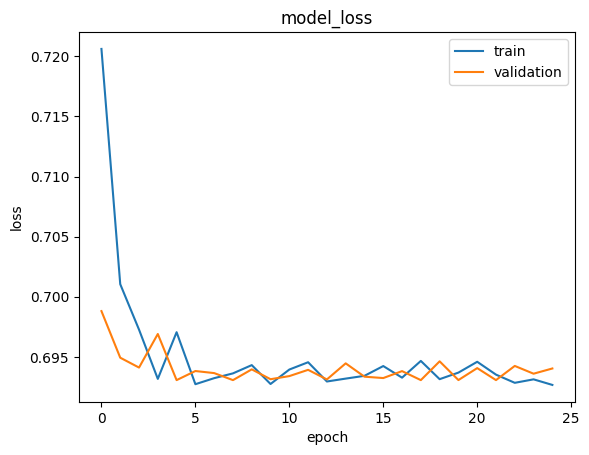

In [39]:
#       print the graphs
#   loss graph
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

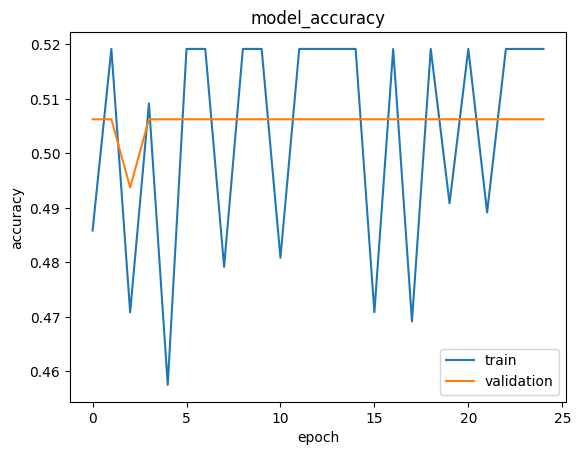

In [40]:
#     accuracy graph
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'lower right')
plt.show

In [41]:
#       PRINT PROBABILITYAND ACTUAL CLASS
# pull out the original images from the data which correspond to the validation data
_, gender , _, valid_y = train_test_split(image_data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = range.choice(len(gender))

# get the corresponding image name and probability
img_name = gender[index]
prob = (predict_x * 100).astype(int)[index] # used to determine probabulity of males to females/females to males
# read the image
img = plt.imread('images/' + img_name)

PRINT PROBABILITY

Gender is: [52] % male
Gender is:  [48] % female 
And actual class is  0


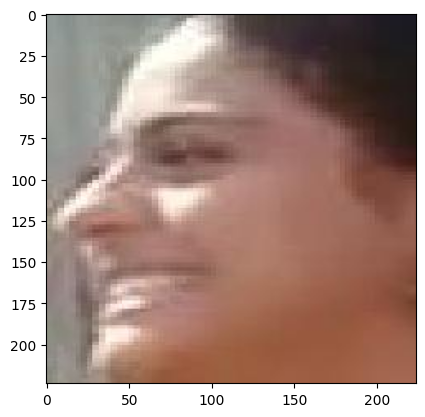

In [42]:
# print probability and actual class
print('Gender is:', prob,  '% male')
print('Gender is: ',100-prob, '% female ')
print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)

HYPERPARAMETER TUNING OF NEURAL NETWORK

In [43]:
#     Change activation function of hidden layer
# using relu as activation function in hidden layer
model=Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [44]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               15052900  
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15053001 (57.42 MB)
Trainable params: 15053001 (57.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
# training the model for 25 epochs
model_history = model.fit(x_train, y_train, epochs=25, batch_size=128,validation_data=(x_valid,y_valid))

Epoch 1/25
10/10 [==============================] - 13s 1s/step - loss: 2.4342 - accuracy: 0.4925 - val_loss: 2.4826 - val_accuracy: 0.4938
Epoch 2/25
10/10 [==============================] - 16s 2s/step - loss: 2.4490 - accuracy: 0.4808 - val_loss: 2.2603 - val_accuracy: 0.4938
Epoch 3/25
10/10 [==============================] - 6s 611ms/step - loss: 2.2248 - accuracy: 0.4808 - val_loss: 2.0371 - val_accuracy: 0.4938
Epoch 4/25
10/10 [==============================] - 7s 774ms/step - loss: 1.9950 - accuracy: 0.4808 - val_loss: 1.8237 - val_accuracy: 0.4938
Epoch 5/25
10/10 [==============================] - 7s 749ms/step - loss: 1.7770 - accuracy: 0.4808 - val_loss: 1.6162 - val_accuracy: 0.4938
Epoch 6/25
10/10 [==============================] - 6s 608ms/step - loss: 1.5696 - accuracy: 0.4808 - val_loss: 1.4177 - val_accuracy: 0.4938
Epoch 7/25
10/10 [==============================] - 10s 1s/step - loss: 1.3738 - accuracy: 0.4808 - val_loss: 1.2362 - val_accuracy: 0.4938
Epoch 8/25
1

VISUALISING ACCURACY OF THE MODEL

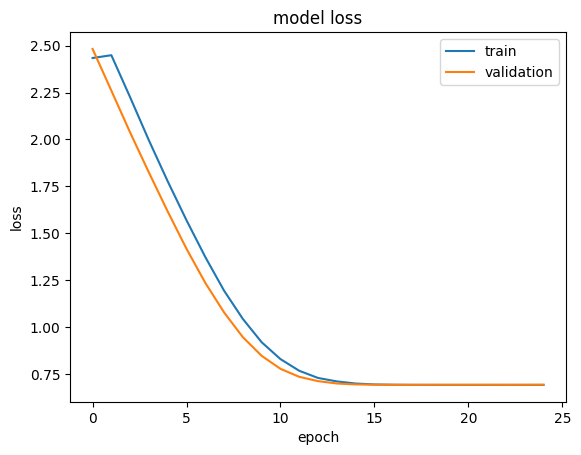

In [46]:

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

INCREASE HIDDEN NEURONS

In [47]:
# increase hidden neurons
model=Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [48]:
# model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1024)              154141696 
                                                                 
 dense_6 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 154142721 (588.01 MB)
Trainable params: 154142721 (588.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model_history = model.fit(x_train, y_train, epochs=25, batch_size=128,validation_data=(x_valid,y_valid))

Epoch 1/25
10/10 [==============================] - 55s 5s/step - loss: 7.7270 - accuracy: 0.5108 - val_loss: 7.5584 - val_accuracy: 0.5063
Epoch 2/25
10/10 [==============================] - 56s 6s/step - loss: 6.3721 - accuracy: 0.5192 - val_loss: 5.1115 - val_accuracy: 0.5063
Epoch 3/25
10/10 [==============================] - 53s 5s/step - loss: 3.9764 - accuracy: 0.5192 - val_loss: 2.6747 - val_accuracy: 0.5063
Epoch 4/25
10/10 [==============================] - 55s 6s/step - loss: 1.6394 - accuracy: 0.5192 - val_loss: 0.7309 - val_accuracy: 0.5063
Epoch 5/25
10/10 [==============================] - 55s 6s/step - loss: 0.8440 - accuracy: 0.4775 - val_loss: 0.9852 - val_accuracy: 0.4938
Epoch 6/25
10/10 [==============================] - 55s 6s/step - loss: 0.8719 - accuracy: 0.4808 - val_loss: 0.6948 - val_accuracy: 0.4938
Epoch 7/25
10/10 [==============================] - 55s 6s/step - loss: 0.7116 - accuracy: 0.5058 - val_loss: 0.7388 - val_accuracy: 0.5063
Epoch 8/25
10/10 [==

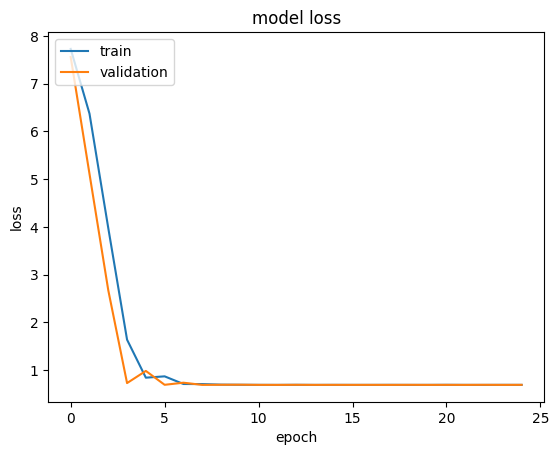

In [50]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

INCREASE HIDDEN LAYERS

In [51]:
# increase hidden layers
model=Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [52]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [53]:
# model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               15052900  
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15063101 (57.46 MB)
Trainable params: 15063101 (57.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model_history = model.fit(x_train, y_train, epochs=25, batch_size=128,validation_data=(x_valid,y_valid))

Epoch 1/25
10/10 [==============================] - 8s 715ms/step - loss: 0.7368 - accuracy: 0.4892 - val_loss: 0.6957 - val_accuracy: 0.5063
Epoch 2/25
10/10 [==============================] - 9s 911ms/step - loss: 0.6990 - accuracy: 0.5192 - val_loss: 0.6999 - val_accuracy: 0.5063
Epoch 3/25
10/10 [==============================] - 7s 650ms/step - loss: 0.6933 - accuracy: 0.5192 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 4/25
10/10 [==============================] - 7s 741ms/step - loss: 0.6932 - accuracy: 0.4942 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 5/25
10/10 [==============================] - 8s 805ms/step - loss: 0.6925 - accuracy: 0.5192 - val_loss: 0.6944 - val_accuracy: 0.5063
Epoch 6/25
10/10 [==============================] - 5s 555ms/step - loss: 0.6932 - accuracy: 0.5192 - val_loss: 0.6938 - val_accuracy: 0.5063
Epoch 7/25
10/10 [==============================] - 9s 936ms/step - loss: 0.6950 - accuracy: 0.4725 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 

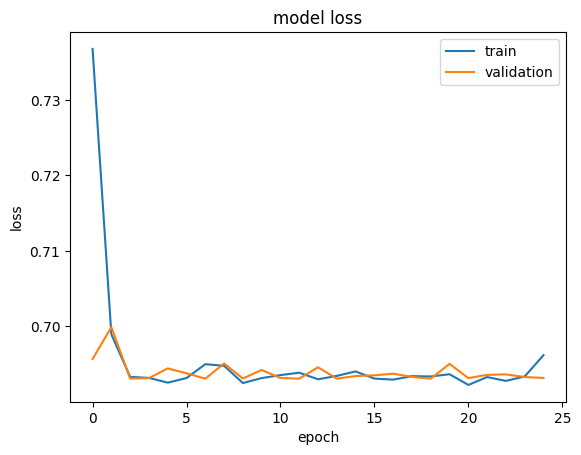

In [55]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

INCREASING NUMBER OF EPACHS

In [56]:
# increase number of epochs
model=Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [57]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [58]:
# model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               15052900  
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15053001 (57.42 MB)
Trainable params: 15053001 (57.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
model_history = model.fit(x_train, y_train, epochs=50, batch_size=128,validation_data=(x_valid,y_valid))

Epoch 1/50
10/10 [==============================] - 12s 1s/step - loss: 2.4296 - accuracy: 0.4892 - val_loss: 2.4788 - val_accuracy: 0.5063
Epoch 2/50
10/10 [==============================] - 6s 589ms/step - loss: 2.3199 - accuracy: 0.5192 - val_loss: 2.2483 - val_accuracy: 0.5063
Epoch 3/50
10/10 [==============================] - 7s 767ms/step - loss: 2.0953 - accuracy: 0.5192 - val_loss: 2.0159 - val_accuracy: 0.5063
Epoch 4/50
10/10 [==============================] - 8s 748ms/step - loss: 1.8704 - accuracy: 0.5192 - val_loss: 1.7890 - val_accuracy: 0.5063
Epoch 5/50
10/10 [==============================] - 6s 608ms/step - loss: 1.6533 - accuracy: 0.5192 - val_loss: 1.5687 - val_accuracy: 0.5063
Epoch 6/50
10/10 [==============================] - 9s 952ms/step - loss: 1.4446 - accuracy: 0.5192 - val_loss: 1.3639 - val_accuracy: 0.5063
Epoch 7/50
10/10 [==============================] - 6s 558ms/step - loss: 1.2533 - accuracy: 0.5192 - val_loss: 1.1786 - val_accuracy: 0.5063
Epoch 8/

THE ACCURACY IS ALWAYS CONSTANT, THERES A SLIGHT DIFFERENCE IN THE LOSS VALUES

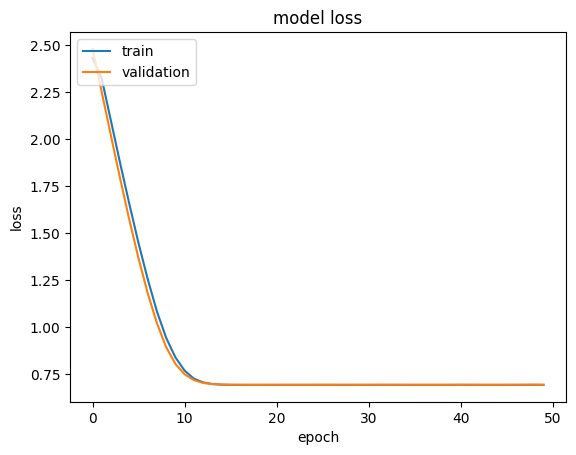

In [60]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

CHANGING THE OPTIMIZER

In [61]:
# change the optimizer
model=Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [62]:
#  optimizer as sgd
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [63]:
# model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               15052900  
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15053001 (57.42 MB)
Trainable params: 15053001 (57.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_history = model.fit(x_train, y_train, epochs=25, batch_size=128,validation_data=(x_valid,y_valid))

 For the sgd optimizer, the loss values remain flactuating, however the accuracy flactuates [fluctuation values are low at lower epocher and increase as higher epoches]

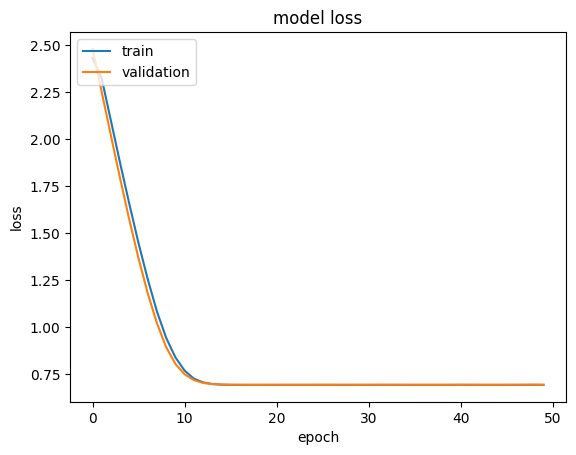

In [64]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()